In [7]:
from ast import literal_eval

import matplotlib.pyplot as plt
from matrepr import mdisplay
from torch import linalg

from koopmann import aesthetics
from koopmann.data import (
    DatasetConfig,
    create_data_loader,
    get_dataset_class,
)
from koopmann.models import MLP, Autoencoder, ExponentialKoopmanAutencoder
from koopmann.models.utils import (
    pad_act,
    parse_safetensors_metadata,
)
import plotly.express as px
from koopmann.utils import compute_model_accuracy
from koopmann.visualization import plot_eigenvalues

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
model_name = "lotusroot_model"
scale_idx = "1"
k = "10"
dim = "20"

In [3]:
model_file_path = f"/home/nsa325/work/koopmann/model_saves/{model_name}.safetensors"

In [4]:
# Dataset config
metadata = parse_safetensors_metadata(file_path=model_file_path)
dataset_config = DatasetConfig(
    dataset_name=metadata["dataset"],
    num_samples=5_000,
    split="test",
    seed=21,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)
dataloader = create_data_loader(dataset, batch_size=1024)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


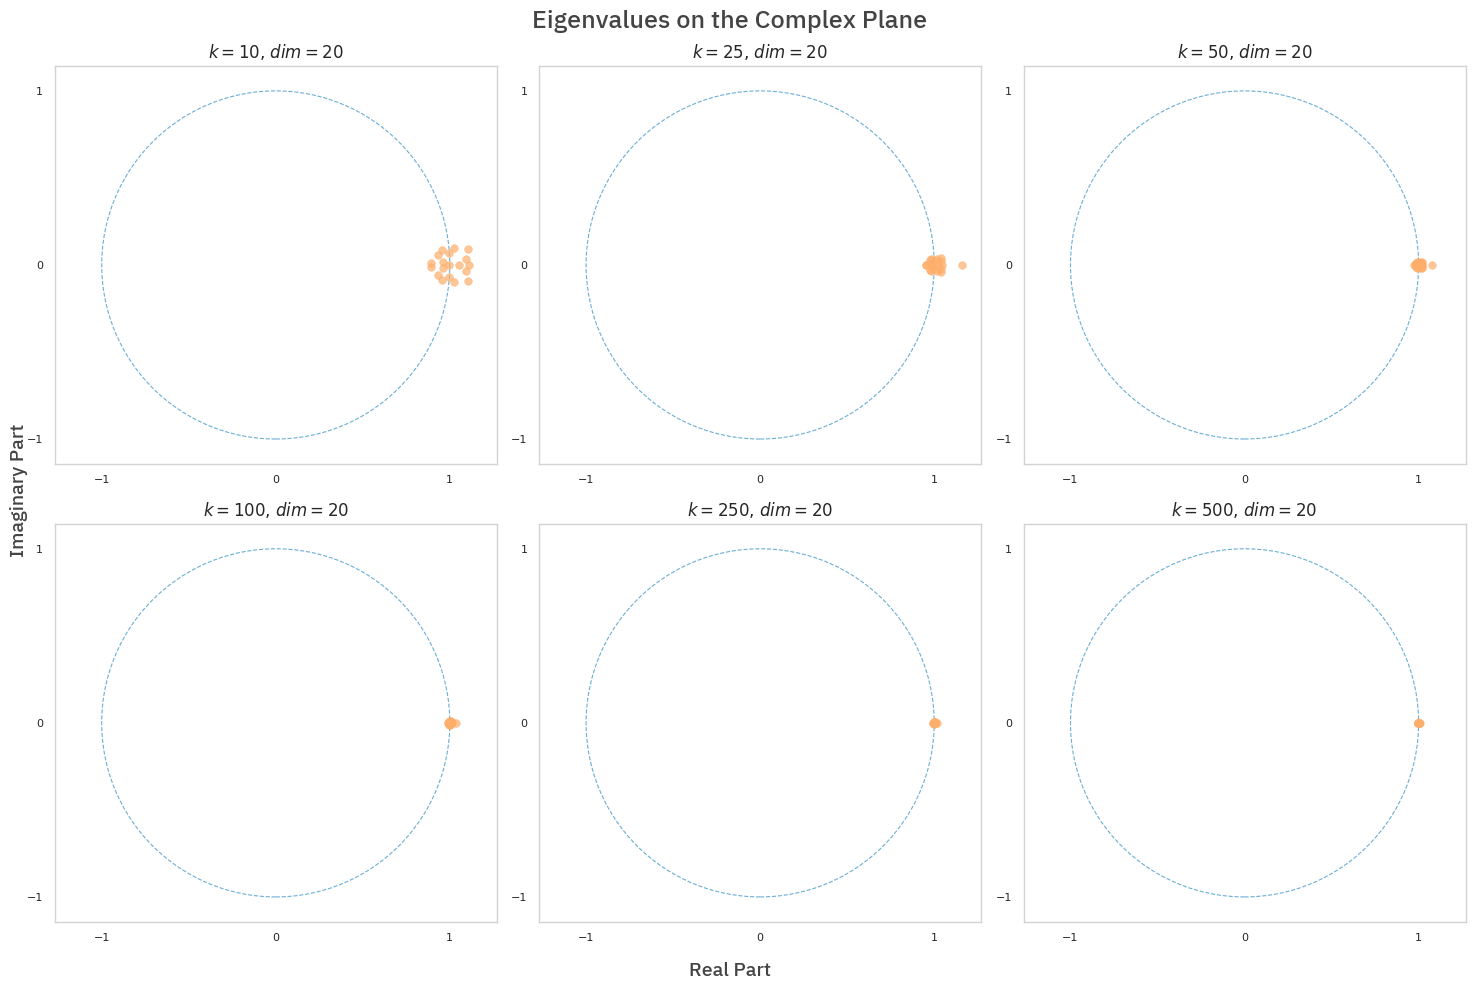

In [5]:
list_k = ["10", "25", "50", "100", "250", "500"]
eigenvalues_dict = {}
for k in list_k:
    ae_file_path = f"/scratch/nsa325/koopmann/k_{k}_dim_{dim}_loc_{scale_idx}_autoencoder_{model_name}.safetensors"
    autoencoder, metadata = ExponentialKoopmanAutencoder.load_model(ae_file_path)
    autoencoder.eval()
    eigenvalues, eigenvectors = linalg.eig(autoencoder.koopman_matrix.linear_layer.weight.detach())
    eigenvalues_dict[(k, dim)] = eigenvalues

fig, axes = plot_eigenvalues(eigenvalues_dict=eigenvalues_dict, tile_size=5, num_rows=2, num_cols=3)

fig.suptitle(
    t="Eigenvalues on the Complex Plane",
    fontsize=18,
    font=aesthetics.ibmplexsans,
    color="#444444",
    # y=0.97,
)
fig.supxlabel("Real Part", fontsize=14, font=aesthetics.ibmplexsans, color="#444444")
fig.supylabel("Imaginary Part", fontsize=14, font=aesthetics.ibmplexsans, color="#444444")
plt.tight_layout()
plt.savefig("eigenvalues")

In [21]:
k = 50
dim = 50
ae_file_path = (
    f"/scratch/nsa325/koopmann/k_{k}_dim_{dim}_loc_{scale_idx}_autoencoder_{model_name}.safetensors"
)
autoencoder, metadata = ExponentialKoopmanAutencoder.load_model(ae_file_path)
autoencoder.eval()
px.imshow(autoencoder.koopman_matrix.linear_layer.weight.detach())